# Pràctica amb programació numèrica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

### Exercici 1
Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [2]:
## Generem la funció
def fun(vector):
    if vector.ndim > 1: 
        raise TypeError("Your array must be 1-dimensional")
        return
    else:
        maxim = np.amax(vector); 
        minim = np.amin(vector)
        median = np.median(vector)
        mean = np.mean(vector)
        std = np.std(vector)
        plt.hist(vector, bins = 20)
        
        print ("El màmix es :", round(maxim,2))
        print ("El mínim es :", round(minim,2))
        print ("La mediana es:", round(median,2))
        print ("La mitjana es:", round(mean, 2))
        print ("La desviació estandar es:", round(std,2))

El màmix es : 91.45
El mínim es : 2.87
La mediana es: 56.22
La mitjana es: 52.44
La desviació estandar es: 29.57


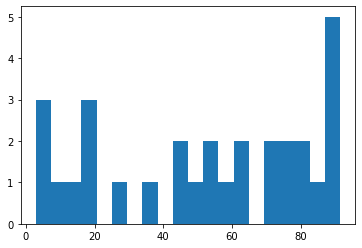

In [3]:
## Provem la funció
vector = np.random.rand(30)*100
fun (vector)

### Exercisi 2

Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [4]:
## Definim la funció
def fun(N):
    try:
        matriu = np.random.rand(N,N)*100
        return np.round(matriu,2)
    except ValueError:
        print ("N must be a positive integer")
        return None

In [5]:
## Provem la funció
N = np.random.randint(-5,5)
matriu = fun(N)
print (N, matriu)

2 [[87.33 84.3 ]
 [85.3  59.31]]


### Exercici 3
Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna.

In [6]:
## Generem la funció
def fun(M):
    sum_fila = np.sum(M, axis = 1)
    sum_columna = np.sum(M, axis = 0)
    
    return sum_fila, sum_columna

In [7]:
## Provem la funció
M = np.random.rand(5,5); M = np.round(M, 2)
fila, columna = fun(M)
print ("Fila:", fila)
print ("Columna:", columna, "\n")
print (M)

Fila: [2.77 2.75 1.33 2.9  1.34]
Columna: [2.38 2.02 2.06 2.17 2.46] 

[[0.94 0.72 0.37 0.64 0.1 ]
 [0.87 0.38 0.19 0.39 0.92]
 [0.02 0.1  0.55 0.44 0.22]
 [0.22 0.55 0.83 0.52 0.78]
 [0.33 0.27 0.12 0.18 0.44]]


### Exercici 4
Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

#### Desviación estandard muestral

$$\sigma_{X} = \sqrt{\frac{\sum_{i=1}^N (x_i - \overline{x})^2}{N-1} }$$

#### Covarianza
$$\sigma_{XY} = \frac{\sum_{i=1}^N (x_i - \overline{x})(y_i - \overline{y})}{N-1}$$

#### Coeficiente de Correlación

$$\rho_{X,Y}={\sigma_{XY} \over \sigma_X \sigma_Y} =\frac{\operatorname{Cov}(X,Y)}{\sqrt{\operatorname{Var}(X)\operatorname{Var}(Y)}}$$

Donde:

* $\sigma_{XY}$ es la covarianza de $(X,Y)$
* $\sigma_{X}$ es la desviación estándar de la variable $X$
* $\sigma_{Y}$ es la desviación estándar de la variable $Y$

Aplicando las definiciones llegamos a la seiguiente formula para el **coeficiente de correlación:** 

$$r_{xy} =\frac{n\sum x_iy_i-\sum x_i\sum y_i}
{\sqrt{n\sum x_i^2-(\sum x_i)^2}~\sqrt{n\sum y_i^2-(\sum y_i)^2}}$$

In [8]:
## Definim la funció
def Pearson(X,Y):
    
    if len(X) != len(Y):
        raise TypeError("X and Y must have the same size!")
        return
    
    N = len(X)
    
    rCoefficient = (N * sum(X*Y) - sum(X)*sum(Y)) / (np.sqrt( N * sum(X**2) - sum(X)**2 ) * np.sqrt( N * sum(Y**2) - sum(Y)**2 ))
    return rCoefficient

Com estem fent la prova amb dos vectors aleatoris, sempre optindrem un coeficient de correlació lineal molt proper a zero.

In [9]:
## Provem la funció
X = np.random.rand(40)
Y = np.random.rand(40)

r_fun = Pearson(X,Y); print (r_fun)

-0.3318271505462223


In [10]:
## Comprovem utilitzan scipy
scipy.stats.pearsonr(X, Y)[0]

-0.331827150546221